In [1]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
import shutil

In [2]:
train_feat_path="processed_dataset\\train\\feat\\"
train_label_path="processed_dataset\\train\\label\\"
test_feat_path="processed_dataset\\test\\feat\\"
test_label_path="processed_dataset\\test\\label\\"

train_name=os.listdir(train_feat_path)
test_name=os.listdir(test_feat_path)

In [4]:
def LoadData() : 
    data = torch.from_numpy(np.load(path))
    return data
    #label = torch.from_numpy(np.load(label_path + item))

In [42]:
status=1

training_data = datasets.DatasetFolder(
    root="processed_dataset\\train\\",
    loader=(),
    transform=ToTensor()
)

test_data = datasets.DatasetFolder(
    root="processed_dataset\\test\\",
    loader=LoadData(),
    transform=ToTensor()
)

ValueError: Both extensions and is_valid_file cannot be None or not None at the same time

In [43]:
class CustomDataset(Dataset):
    def __init__(self, annotations_file, transform=None, target_transform=None):
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        feat = np.load(feat_path + item)
        label = np.load(label_path + item)
        if self.transform:
            feat = self.transform(feat)
        if self.target_transform:
            label = self.target_transform(label)
        return feat, label

In [22]:
import numpy as np

In [44]:
class CustomTrainDataset(Dataset):
    def __init__(self, feat_path=train_feat_path , label_path=train_label_path , transform=None, target_transform=None):
        self.img_labels = os.listdir(train_feat_path)
        self.feat_path = feat_path 
        self.label_path = label_path
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        data = (torch.from_numpy(np.load(self.feat_path +self.img_labels[idx])))
        label = (torch.from_numpy(np.load(self.label_path +self.img_labels[idx])))
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        return data, label

class CustomTestDataset(Dataset):
    def __init__(self, feat_path=test_feat_path , label_path=test_label_path , transform=None, target_transform=None):
        self.img_labels = os.listdir(train_feat_path)
        self.feat_path = feat_path 
        self.label_path = label_path
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        data = (torch.from_numpy(np.load(self.feat_path +self.img_labels[idx])))
        label = (torch.from_numpy(np.load(self.label_path +self.img_labels[idx])))
        '''
        if self.transform:
            data = self.transform(data)
        if self.target_transform:
            label = self.target_transform(label)
        '''
        print(self.feat_path +self.img_labels[idx])
        return data, label

In [51]:
train_dataset=CustomTrainDataset()
test_dataset=CustomTrainDataset()

## DATALOADER

In [67]:
from torch.utils.data import DataLoader

train = DataLoader(train_dataset, batch_size=32, shuffle=True)
test = DataLoader(train_dataset, batch_size=32, shuffle=True)

In [46]:
dataset_iter = iter(dataset)
for indices in batch_sampler:
    yield collate_fn([next(dataset_iter) for _ in indices])

SyntaxError: 'yield' outside function (<ipython-input-46-5f3764ea4fcb>, line 3)

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


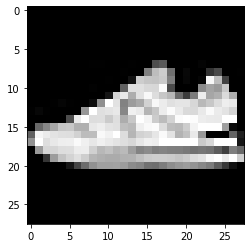

torch.Tensor

In [26]:
# Display image and label.
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
type(label)
#print("Label: ",labels_map[f"label"])